# WorkBook - K Means (College Data and Real Estate) - part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('College_Data',index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Let's do some visualizations

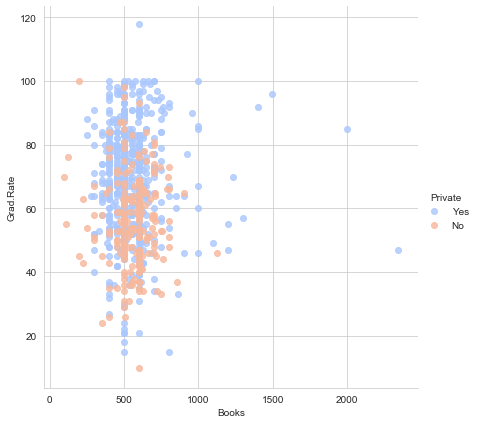

In [5]:
sns.set_style('whitegrid')
sns.lmplot('Books','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


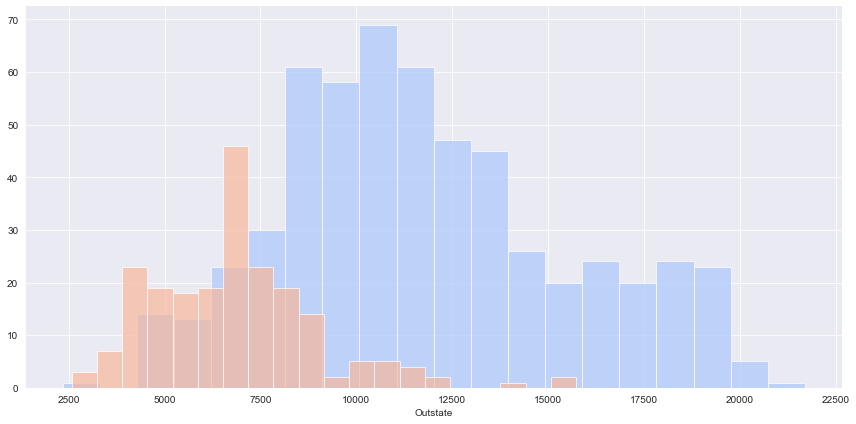

In [6]:
sns.set_style('darkgrid')

g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)


g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

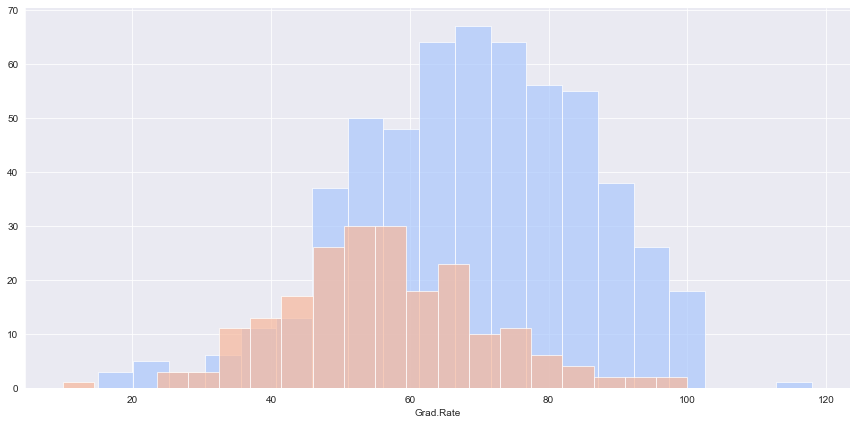

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=2)

In [10]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### The Data
#### We will use a data frame with 777 observations on the following 18 variables.

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

Please note that: Data is coming from the class of Jose Portilla

In [22]:
len(kmeans.cluster_centers_[0])

17

In [13]:
kmeans.cluster_centers_[1]

array([ 1813.23467862,  1287.16591928,   491.04484305,    25.30941704,
          53.47085202,  2188.54857997,   595.45889387, 10395.70852018,
        4311.36472347,   541.98206278,  1280.33632287,    70.44245142,
          77.82511211,    14.09970105,    23.17488789,  8932.04633782,
          65.11958146])

In [37]:
df2 = df.drop('Private',axis=1)

In [38]:
df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [49]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [50]:
df['Cluster2'] = df['Private'].apply(converter)

In [39]:
# kmeans= KMeans(n_clusters=3)
# done
X_clustered = kmeans.fit_predict(df2)

In [55]:
X_clustered[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
df["cluster"] = X_clustered

In [43]:
#https://www.geeksforgeeks.org/how-to-select-multiple-columns-in-a-pandas-dataframe/

In [52]:
df[['Private', 'cluster', 'Cluster2']]

,Private,cluster,Cluster2
Abilene Christian University,Yes,0,1
Adelphi University,Yes,0,1
Adrian College,Yes,0,1
Agnes Scott College,Yes,0,1
Alaska Pacific University,Yes,0,1
...,...,...,...
Worcester State College,No,0,0
Xavier University,Yes,0,1
Xavier University of Louisiana,Yes,0,1
Yale University,Yes,1,1


In [58]:
kmeans.labels_[3:5]

array([0, 0])

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

print("This is the Confusion Matrix")
print(confusion_matrix(df['Cluster2'],kmeans.labels_))
print("This is the Classification Report")
print(classification_report(df['Cluster2'],kmeans.labels_))

This is the Confusion Matrix
[[138  74]
 [531  34]]
This is the Classification Report
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [56]:
df.to_csv("stelios_2.csv", index=False)

# Saving our report in txt !

In [61]:
report = classification_report(df['Cluster2'],kmeans.labels_, output_dict=True)

In [62]:
report

{'0': {'precision': 0.2062780269058296,
  'recall': 0.6509433962264151,
  'f1-score': 0.3132803632236095,
  'support': 212},
 '1': {'precision': 0.3148148148148148,
  'recall': 0.06017699115044248,
  'f1-score': 0.10104011887072809,
  'support': 565},
 'accuracy': 0.22136422136422138,
 'macro avg': {'precision': 0.2605464208603222,
  'recall': 0.3555601936884288,
  'f1-score': 0.2071602410471688,
  'support': 777},
 'weighted avg': {'precision': 0.2852011738409347,
  'recall': 0.22136422136422138,
  'f1-score': 0.1589486540094808,
  'support': 777}}

In [64]:
df_report = pd.DataFrame(report).transpose()

In [65]:
df_report

,precision,recall,f1-score,support
0,0.206278,0.650943,0.313280,212.000000
1,0.314815,0.060177,0.101040,565.000000
accuracy,0.221364,0.221364,0.221364,0.221364
macro avg,0.260546,0.355560,0.207160,777.000000
weighted avg,0.285201,0.221364,0.158949,777.000000


In [66]:
#https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [67]:
df_report.to_csv("our_classification_report_in_csv.csv", index=False)

###  How can we save the above table as an image?

In [68]:
print(classification_report(df['Cluster2'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [80]:
print ('\nClassification Report:\n', classification_report(df['Cluster2'],kmeans.labels_), confusion_matrix(df['Cluster2'],kmeans.labels_))


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777
 [[138  74]
 [531  34]]


In [83]:
aa1 = classification_report(df['Cluster2'],kmeans.labels_)

In [95]:
#image

In [91]:
from PIL import Image, ImageDraw, ImageFont

In [102]:
print(aa1)

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [113]:
from PIL import Image, ImageDraw, ImageFont

image = Image.new('RGB', (800, 400))
draw = ImageDraw.Draw(image)

font = ImageFont.truetype("arial.ttf", 16)

draw.text((0, 0), str((aa1)), font=font)

image2 = image.convert('1')
image3 = image2.resize((600, 300), Image.ANTIALIAS)
image3.save('output.png')

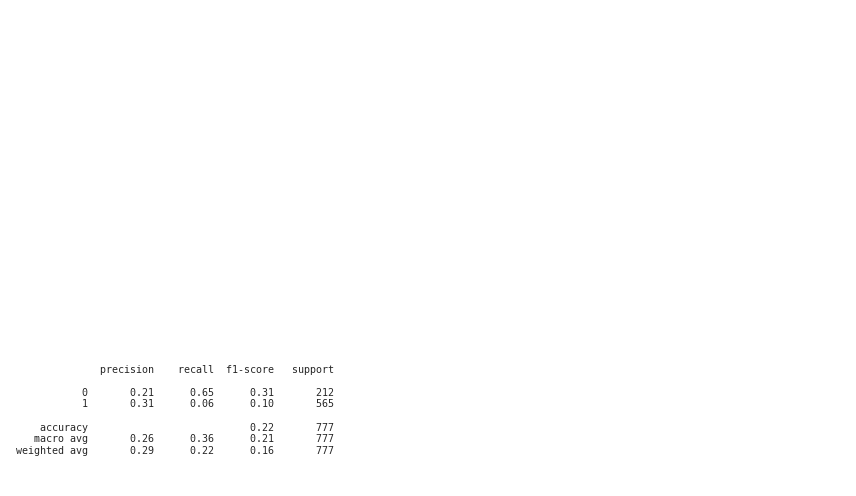

In [115]:
import matplotlib.pyplot as plt

#plt.rc('figure', figsize=(12, 7))

#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach

plt.text(0.01, 0.05, str(aa1), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!

plt.axis('off')
plt.tight_layout()

plt.savefig('output2.png')

In [86]:
 # https://pythonguides.com/python-save-an-image-to-file/

In [81]:
# print ('\n*Classification Report:\n', classification_report(df['Cluster2'],kmeans.labels_)), confusion_matrix(df['Cluster2'],kmeans.labels_))

# Find out how a new set of data is claffifed?


say we have a new entry, that consists of the following features:
    

In [118]:
row_10=df2.iloc[10]

original_row_10=df.iloc[10]
original_row_10

Private          Yes
Apps            1732
Accept          1425
Enroll           472
Top10perc         37
Top25perc         75
F.Undergrad     1830
P.Undergrad      110
Outstate       16548
Room.Board      5406
Books            500
Personal         600
PhD               82
Terminal          88
S.F.Ratio       11.3
perc.alumni       31
Expend         10932
Grad.Rate         73
cluster            0
Cluster2           1
Name: Alfred University, dtype: object

In [149]:
#list_object.t


numpy_array2 = np.array(list_object2)

numpy_array2

array(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'], dtype='<U11')

In [159]:
row_test = df2[56:58]



In [136]:
import array
a1 = [0]
array =  a1 * 1

In [147]:
list_object2 = []

In [154]:
for i in row_test:
    #print(i[0])
    #list_object2.append(i)

SyntaxError: unexpected EOF while parsing (<ipython-input-154-59ed9a13599a>, line 3)

In [161]:
len(row_test)

2

In [168]:
list_a = []
list_b = []

In [169]:
for i in range(len(row_test)):
    for j in row_test.iloc[i]:
        print(j)
        list_a.append(j)
    list_b.append(list_a)
    list_a = []

6773.0
3028.0
1025.0
15.0
55.0
5847.0
946.0
7844.0
2948.0
500.0
1680.0
66.0
68.0
18.0
19.0
7041.0
75.0
377.0
358.0
181.0
15.0
30.0
653.0
129.0
7150.0
4350.0
450.0
1500.0
61.0
67.0
17.8
3.0
6259.0
53.0


In [170]:
list_b

[[6773.0,
  3028.0,
  1025.0,
  15.0,
  55.0,
  5847.0,
  946.0,
  7844.0,
  2948.0,
  500.0,
  1680.0,
  66.0,
  68.0,
  18.0,
  19.0,
  7041.0,
  75.0],
 [377.0,
  358.0,
  181.0,
  15.0,
  30.0,
  653.0,
  129.0,
  7150.0,
  4350.0,
  450.0,
  1500.0,
  61.0,
  67.0,
  17.8,
  3.0,
  6259.0,
  53.0]]

In [171]:

numpy_array3 = np.array(list_b)

numpy_array3

array([[6.773e+03, 3.028e+03, 1.025e+03, 1.500e+01, 5.500e+01, 5.847e+03,
        9.460e+02, 7.844e+03, 2.948e+03, 5.000e+02, 1.680e+03, 6.600e+01,
        6.800e+01, 1.800e+01, 1.900e+01, 7.041e+03, 7.500e+01],
       [3.770e+02, 3.580e+02, 1.810e+02, 1.500e+01, 3.000e+01, 6.530e+02,
        1.290e+02, 7.150e+03, 4.350e+03, 4.500e+02, 1.500e+03, 6.100e+01,
        6.700e+01, 1.780e+01, 3.000e+00, 6.259e+03, 5.300e+01]])

In [175]:
kmeans.fit_predict(numpy_array3)

array([0, 1])

In [178]:
row_test2 = df[56:58]
row_test2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster,Cluster2
Bloomsburg Univ. of Pennsylvania,No,6773,3028,1025,15,55,5847,946,7844,2948,500,1680,66,68,18.0,19,7041,75,0,0
Bluefield College,Yes,377,358,181,15,30,653,129,7150,4350,450,1500,61,67,17.8,3,6259,53,0,1


# Comments to Follow: